#  Theory for pr meta-analysis paper

In [1]:
#Load some modules etc
%matplotlib inline
import matplotlib.pyplot as plt
from sympy import *
import scipy as sc
import numpy
init_printing()

## The effect of warming on Net Carbon Flux (NCF) 

Here we derive how the termperature depednence of NCF depends on mismatches in thermal sensitivity and thermal 
optimum of the underlying metabolic rates. 

NCF is the rate of an individual organism's net carbon gain or loss:

$$ \text{NCF = Carbon Gain Rate - Carbon Loss Rate}$$

A 24-hr day-night cycle is the shortest timescale at which NCF can be calculated, as the difference between daytime net photosynthesis ($P$) and night-time respiration ($R$) rates: 

$$ \text{NCF} = \gamma P - (1-\gamma) R $$

where $P$ is the difference between daytime gross photosynthesis $P_\text{g}$ and respiration $R_l$ (the subscript denoting respiration in light):

$$ P = P_\text{g} - R_l $$

and $\gamma$ is proportion of daylight in the 24-hr cycle. A positive NCF implies net carbon gain (net in-flux). Henceforth, we deal only with $P$ and $R$ because these are the only two directly-measurable quantities empirically. 

We start by defining the thermal responses of $R$ and $P$ using the modified Sharpe-Schoolfield equation, with the $T_r$-normalized $P_0$ as a constant multiple $c$ of the $T_r$-normalized $R_0$ (i.e., where $c > 1$), i.e.,

$$c = \frac{P_0}{R_0}$$

We also introduce a temperature parameter $b$ (in $^{\circ}$C) which allows night and day temperatures to be related, i.e., 

$$T_d = T - b$$ 

where $T_d$ and $T$ are night- and day-time temperatures (in $^{\circ}$C) respectively, and $b\ge0$. Thus the temperature-dependent NCF model and it's $P$ and $R$ components is: 

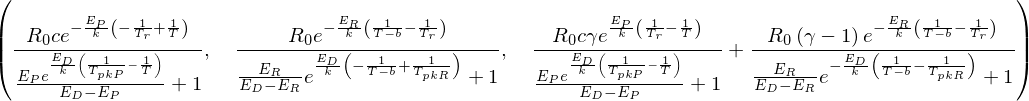

In [2]:
# Assign symbols
x, c, a, b, gamma, P_0, R_0, E_P, E_R, E_D, T_pkP, T_pkR, k, T, T_r = var('x c a b gamma P_0 R_0 E_P E_R E_D T_pkP T_pkR k T T_r')

# Assign functions
P = c* R_0 * exp(-(E_P/k) * (1/T - 1/T_r)) /(1 + (E_P / (E_D - E_P)) * exp((E_D / k)* (1/T_pkP - 1/T)))
R = R_0 * exp(-(E_R/k) * (1/(T-b) - 1/T_r)) /(1 + (E_R / (E_D - E_R)) * exp((E_D/k)* (1/T_pkR - 1/(T-b))))
N = simplify(gamma * P - (1 - gamma) *R)

P, R, N

The following figure plots the NCF model and its components:

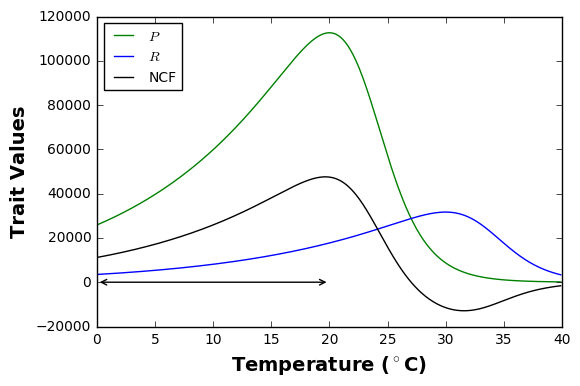

In [3]:
# Assign parameter values
k_par = 8.617 * 10**-5
E_P_par = .56
E_P1_par = .7
E_R_par = .56
E_D_par = 4.
T_pkP_par = 20.
T_pkR_par = T_pkP_par + 10.
T_r_par = 10+273.15
R_0_par = sc.exp(9)
c_par = sc.exp(11)/sc.exp(9) # P_0 is c x R_0
b_par = 0 # assume no difference between night and day temperatures
gamma_par = 0.5 # 12:12 day night cycle

T_vec = 273.15+numpy.arange(0, 40, 0.1) #vector of temperatures
R_vec = numpy.array([R.evalf(subs = {R_0:R_0_par,E_R:E_R_par,b:b_par,T_pkR:T_pkR_par+273.15,T_r:T_r_par,E_D:E_D_par,k:k_par,T:temper}) for temper in T_vec])
P_vec = numpy.array([P.evalf(subs = {R_0:R_0_par,c:c_par,E_P:E_P_par,T_pkP:T_pkP_par+273.15,T_r:T_r_par,E_D:E_D_par,k:k_par,T:temper}) for temper in T_vec])
P1_vec = numpy.array([P.evalf(subs = {R_0:R_0_par,c:c_par,E_P:E_P1_par,T_pkP:T_pkP_par+273.15,T_r:T_r_par,E_D:E_D_par,k:k_par,T:temper}) for temper in T_vec])
N_vec = numpy.array([N.evalf(subs = {R_0:R_0_par,c:c_par,b:b_par,gamma:gamma_par,E_P:E_P_par,E_R:E_R_par,T_pkP:T_pkP_par+273.15,T_pkR:T_pkR_par+273.15,T_r:T_r_par,E_D:E_D_par,k:k_par,T:temper}) for temper in T_vec])

fig = plt.figure(); ax = fig.add_subplot(111)
plt.hold(True)
ax.plot(T_vec-273.15, P_vec.astype(float),'green')
ax.plot(T_vec-273.15, R_vec.astype(float),'blue')
ax.plot(T_vec-273.15, N_vec.astype(float),'black')
#ax.arrow(0, 4, T_pkP_par, 4, head_width=0.5, head_length=0.5, fc='--k', ec='--k')
ax.annotate(s='', xy=(0,4.5), xytext=(T_pkP_par,4.5), arrowprops=dict(arrowstyle='<->'))
ax.plot([T_pkP_par, T_pkP_par], [-4,10], color='k', linestyle='--', linewidth=1)

ax.set_xlabel('Temperature ($^\circ$C)', fontsize=14, fontweight = 'bold')
ax.set_ylabel('Trait Values', fontsize=14, fontweight = 'bold')
plt.legend(['$P$','$R$', 'NCF'], fontsize=10, loc='upper left')

#plt.savefig('../results/NCF_Model.pdf')


### The thermal dependence of NCF within the OTR

We can model the thermal response of NCF within the OTR by ignoring the parts of the TPCs above $T_{\text{pk},P}$. This  can be done by simply keeping only the Boltzmann-Arrhenius equation part of the Sharpe-Schoolfield equation:

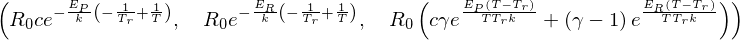

In [4]:
P_OTR = c* R_0 * exp(-(E_P/k) * ((1/T) - (1/T_r)))
#R_OTR = R_0 * exp(-(E_R/k) * ((1/(T-b) - (1/T_r)))) # for the model with different day/night temperatures  
R_OTR = R_0 * exp(-(E_R/k) * ((1/(T) - (1/T_r))))

N_OTR = simplify(gamma * P_OTR - (1- gamma)* R_OTR)
P_OTR, R_OTR, N_OTR

The following figure shows that the Boltzmann-Arrhenus equations adequately capture the thermal responses of NCF below $T_{\text{pk},P}$:

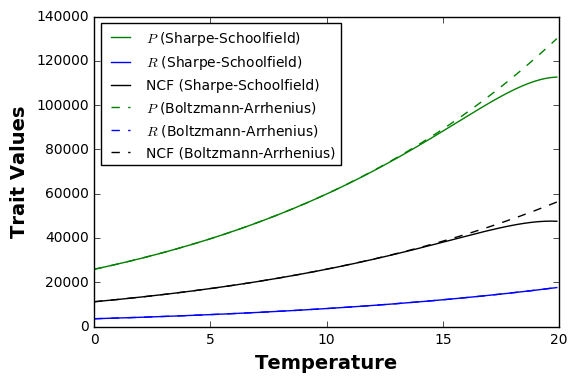

In [5]:
T_vec = 273.15+numpy.arange(0, T_pkP_par, 0.1) # OTR vector of temperatures
R_vec = numpy.array([R.evalf(subs = {R_0:R_0_par,E_R:E_R_par,b:b_par,T_pkR:T_pkR_par+273.15,T_r:T_r_par,E_D:E_D_par,k:k_par,T:temper}) for temper in T_vec])
P_vec = numpy.array([P.evalf(subs = {R_0:R_0_par,c:c_par,E_P:E_P_par,T_pkP:T_pkP_par+273.15,T_r:T_r_par,E_D:E_D_par,k:k_par,T:temper}) for temper in T_vec])
R_OTR_vec = numpy.array([R_OTR.evalf(subs = {R_0:R_0_par,E_R:E_R_par,b:b_par,T_r:T_r_par,k:k_par,T:temper}) for temper in T_vec])
P_OTR_vec = numpy.array([P_OTR.evalf(subs = {R_0:R_0_par,c:c_par,E_P:E_P_par,T_r:T_r_par,k:k_par,T:temper}) for temper in T_vec])
N_vec = gamma_par * P_vec.astype(float) - (1-gamma_par) * R_vec.astype(float)
N_OTR_vec = gamma_par * P_OTR_vec.astype(float) - (1-gamma_par)* R_OTR_vec.astype(float)

fig = plt.figure(); ax = fig.add_subplot(111)
plt.hold(True)
ax.plot(T_vec-273.15, P_vec.astype(float),'green')
ax.plot(T_vec-273.15, R_vec.astype(float),'blue')
ax.plot(T_vec-273.15, N_vec,'black')
ax.plot(T_vec-273.15, P_OTR_vec.astype(float),'g--')
ax.plot(T_vec-273.15, R_OTR_vec.astype(float),'b--')
ax.plot(T_vec-273.15, N_OTR_vec,'k--')

ax.set_xlabel('Temperature', fontsize=14, fontweight = 'bold')
ax.set_ylabel('Trait Values', fontsize=14, fontweight = 'bold')
plt.legend(['$P$ (Sharpe-Schoolfield)', '$R$ (Sharpe-Schoolfield)', 'NCF (Sharpe-Schoolfield)', '$P$ (Boltzmann-Arrhenius)', '$R$ (Boltzmann-Arrhenius)', 'NCF (Boltzmann-Arrhenius)'], loc='upper left', fontsize=10)

We can now approximate the NCF temperature response in the OTR by a series expansion around $T_r$: 

$${\left({\left(c + 1\right)} \gamma - 1\right)} R_{0} e^{\left(\frac{{\left(E_{P} c \gamma + E_{R} \gamma - E_{R}\right)} {\left(T - T_{r}\right)}}{{\left({\left(c + 1\right)} \gamma - 1\right)} T_{r}^{2} k}\right)}
$$

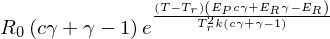

In [6]:
R_OTR = R_0 * exp(-(E_R/k) * ((1/(T) - (1/T_r)))) # switch back to model without b
N_OTR = simplify(gamma * P_OTR - (1- gamma)* R_OTR)

N_OTR_appx = simplify(exp(series(ln(N_OTR),T,T_r,2).removeO()));N_OTR_appx
#print(latex(N_OTR_appx))

#Or, define x =  -((1/(k*T)) - (1/(k*T_ref
#x =  -((1/(k*T)) - (1/(k*T_r))); simplify(x)
#N_app = R_0 *(c * exp(E_P*x) - exp(E_R * x))
#N_appx = series(ln(N_app),x,[],2); exp(N_appx) # replace [] with some value for expansion around that value

Thus, 

$$\text{NCF} \approx R_0 (c \gamma + \gamma - 1) e^{\frac{(T - T_r)\left(E_P c \gamma + E_R (\gamma - 1)\right)}{T_r^2 k (c \gamma + \gamma - 1)}}$$

where $$c = \frac{P_0}{R_0}$$

and therefore,

$$\log(\text{NCF}) \approx  \log(R_0 (c \gamma + \gamma - 1)) + \frac{T - T_r}{T_r^2 k (c \gamma + \gamma - 1)} \left(E_P c \gamma + E_R (\gamma - 1)\right)$$

Note that the accuracy of the above approximation for NCF depends on the reference temperature $T_r$. The approximation is good as long as $T_r$ lies within the OTR (0$^\circ$C - $T_{\text{pk},P}$), and the best when $T_r$ is the mid-point of the OTR. The following figure shows how good the approximation is:

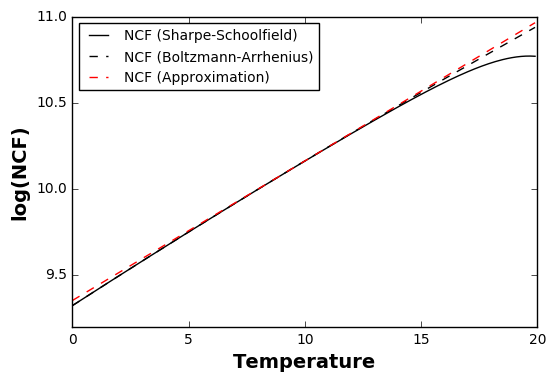

In [7]:
N_OTR_appx_vec = numpy.array([N_OTR_appx.evalf(subs = {R_0:R_0_par,c:c_par, gamma:gamma_par,E_R:E_R_par,E_P:E_P_par,T_r:T_r_par,k:k_par,T:temper}) for temper in T_vec])

fig = plt.figure(); ax = fig.add_subplot(111)
plt.hold(True)
ax.plot(T_vec-273.15, sc.log(N_vec),'black')
ax.plot(T_vec-273.15, sc.log(N_OTR_vec),'k--')
ax.plot(T_vec-273.15, sc.log(N_OTR_appx_vec.astype(float)),'r--')

ax.set_xlabel('Temperature', fontsize=14, fontweight = 'bold')
ax.set_ylabel('log(NCF)', fontsize=14, fontweight = 'bold')
plt.legend(['NCF (Sharpe-Schoolfield)', 'NCF (Boltzmann-Arrhenius)', 'NCF (Approximation)'], fontsize=10, loc='upper left')

Now, defining

$$\Delta E := E_P c \gamma + E_R (\gamma - 1)$$

(sensitivity mismatch), we have  

$$\log(\text{NCF}) \approx  \log(R_0 (c \gamma + \gamma - 1)) + \frac{T - T_r}{k T_r^2 (c \gamma + \gamma - 1)} \Delta E$$

$$\log(\text{NCF}) \approx  \log(R_0 (c \gamma + \gamma - 1)) - \frac{\Delta E}{T_r k (c \gamma + \gamma - 1)} + \frac{\Delta E}{T_r^2 k (c \gamma + \gamma - 1)} T $$


That is, the response of NCF to warming within the OTR depends, in the log scale, approxmately linearly on the sensitivity mismatch $\Delta E$, with intercept $\log(R_0 (c \gamma + \gamma - 1)) - \frac{\Delta E}{T_r k (c \gamma + \gamma - 1)}$ and slope $\frac{\Delta E}{T_r^2 k (c \gamma + \gamma - 1)}$. 

The above model shows that $\gamma$ and the ratio $c = P_0/R_0$ of the $T_{ref}$-normalized constants of $R$ and $P$ determine both, whether baseline NCF at a given temperature is positive (net carbon gain; determined by the intercept), and whether with warming, this baseline NCF will increase or decrease (determined by the slope). So we now determine the conditions for NCF to be positive at a given $T_\text{r}$, and for it to be increasing with temperature increase within a day. 

#### Conditions for NCF to be positive at a given reference temperature 

For baseline net carbon flux (NCF) to be positive at a given reference temperature in a 24-hr cycle, the intercept has to be positive, i.e., the condition 

$$\log(R_0 (c \gamma + \gamma - 1)) - \frac{\Delta E}{T_r k (c \gamma + \gamma - 1)} > 0$$

has to be satisfied. Rearranging this inequality, and keeping in mind that $c = \frac{P_0}{R_0}$ we have, 

$$ P_0 > \frac{e^{\frac{\Delta E}{T_r k (c \gamma + \gamma - 1)}} - R_0 (\gamma - 1)}{\gamma}$$

This means that for a given $\gamma$, an environmental variable largely out of the control of the organism, $P_0$ has to be large enough to saisfy the above inequality. For example, for a 12-hr growth period ($\gamma = 0.5$), the condition becomes,



($c > 1$), and for a 6-hr growth period, the condition becomes 

($c > 3$). 

Rearranging the above equation for a 12-hr growth period ($\gamma=0.5$) and substituting $\Delta E$ by its definition above we have,

$$ P_0 > \frac{e^{\frac{E_p c 0.5 -0.5 E_r}{T_r k (c 0.5 - 0.5)}} + R_0 0.5}{0.5}$$

thus,

$$ 0.5 P_0 - 0.5 R_0> e^{\frac{E_p c - E_r}{T_r k (c - 1)}}$$

where reformulating and taking logs,

$$ T_r k log(\frac{P_0 - R_0}{2})> \frac{E_p c - E_r}{c - 1}$$

Now, defining

$$ z = log(\frac{P_0 - R_0}{2})^{T_r k}$$

and substituting above we have,

$$c -1 > \frac{E_p}{z} c - \frac{E_r}{z}$$

that can be arranged as

$$c > \frac{z - E_r}{z - E_p}$$

As $z$ is approximately 1 (because of exponentiating to a really small number such as $k$), the condition for NCF to be positive is that $c$ has to be large enough than the mismatch between $E_r$ and $E_p$. And because $E_r>=E_p$, $c$ will be larger than 1 for the condition to be met.


#### Conditions for NCF to be increasing with warming in  24-hr cycle 

However, even if this condition is satisfied and the basline NCF is positive, whether NCF then responds positively to warming (increases with temperature) depends on the slope, i.e., the inequality $\frac{E_P c \gamma + E_R (\gamma - 1)}{T_r^2 k (c \gamma + \gamma - 1)}  > 0 $ has to be satisfied. That is, the condition 

$$c \gamma E_P + (\gamma - 1) E_R > 0$$ 

i.e., 

$$c > \frac{1- \gamma}{\gamma} \frac{E_R}{E_P }$$

If there is no difference between the two activation energies, the condition for a positive response (slope) of NCF is the same as that for a positive baseline NCF: $c$ has to be large enough. Conversely, for a given $\gamma$, either the difference in the $E$'s has to small, or again, $c$ large enough. For example, for a 12-hr growth period ($\gamma = 0.5$) and $c = 2$,  the condition is $E_P > \frac{E_R}{2}$, i.e., $E_P$ has to be atleast half of $E_R$. 


### The thermal dependence of NCF above the OTR

To derive the effect of physiological mismatches on the CUE above the OTR, we need to consider the full TPCs of $R$ and $P$. This is a lot more complicated to do analytically. Assuming $T_{\text{pk},R} > T_{\text{pk},P}$, we can analyze the effect of warming on NCF beyond $T_{\text{pk},P}$ using the simplified model: 

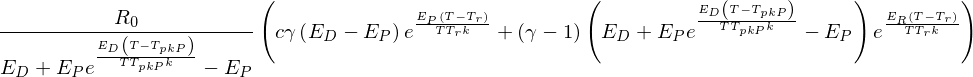

In [8]:
N_OTR1 = gamma * P - (1 - gamma) * R_OTR; simplify(N_OTR1)

In [9]:
#N_OTR1_appx = simplify(exp(series(ln(N_OTR1),T,T_r,2).removeO()));N_OTR1_appx

## The effect of warming on Carbon Use Efficiency (CUE) 

CUE is the ratio of net to gross carbon fixed: 

$$\text{CUE} = \frac{\text{Net Carbon Fixation rate}}{\text{Gross Carbon Fixation rate}}$$

Assuming a cell is carbon limited, the CUE is a measure of the growth potential of an individual autotroph. Over a 24-hr day-night cycle this can be calculated from the underlying metabolic rates as:

$$\textrm{CUE} = \frac{\gamma P - (1-\gamma) R}{\gamma P_\text{g}} = \frac{\text{NCF}}{\gamma P_\text{g}}$$

Where the parameters have the same meaning as in the NCF model above with 

$$P = P_\text{g} -  R_\text{l}$$

Thus, $$P_g = P +  R_\text{l}$$

and

$$\textrm{CUE} = \frac{\gamma P - (1-\gamma) R}{\gamma (P +  R_\text{l})}$$

Further, assuming that the diurnal respiration rate $R_\text{l}$ is a constant fraction ($a$) of the nocturnal respiration rate, we have, 

$$\textrm{CUE} = \frac{\gamma P - (1-\gamma) R}{\gamma (P +  a R)} = \frac{\gamma (P + R)- R}{\gamma (P +  a R)}$$

As in the case of the temperature-dependent NCF model above, we now proceed by using the thermal responses of $R$ and $P$ modeled by the modified Sharpe-Schoolfield equation:

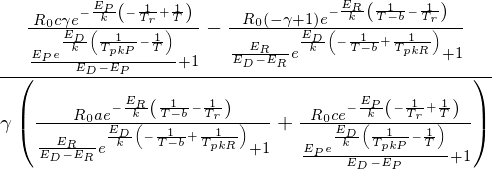

In [10]:
C = (gamma * P- (1 - gamma) * R) / (gamma * (P  + a * R))  ; C

The following figure plots the model and it's components:

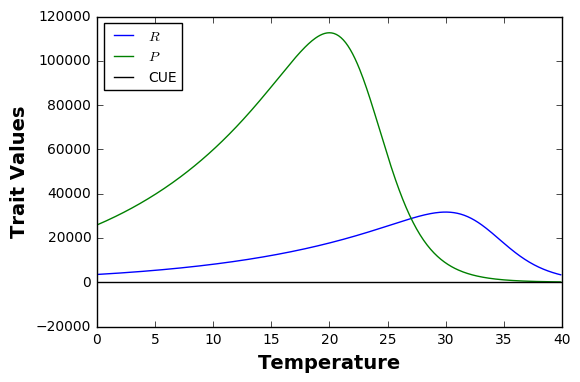

In [26]:
# Assign additonal parameter values
a_par = 1 #day respiration as 1/10th of night respiration

T_vec = 273.15+numpy.arange(0, 40, 0.1) #vector of temperatures
R_vec = numpy.array([R.evalf(subs = {R_0:R_0_par,E_R:E_R_par,b:b_par,T_pkR:T_pkR_par+273.15,T_r:T_r_par,E_D:E_D_par,k:k_par,T:temper}) for temper in T_vec])
P_vec = numpy.array([P.evalf(subs = {R_0:R_0_par,c:c_par,E_P:E_P_par,T_pkP:T_pkP_par+273.15,T_r:T_r_par,E_D:E_D_par,k:k_par,T:temper}) for temper in T_vec])
C_vec = numpy.array([C.evalf(subs = {R_0:R_0_par,gamma:gamma_par,b:b_par,a:a_par,c:c_par,E_P:E_P_par,E_R:E_R_par,T_pkP:T_pkP_par+273.15,T_pkR:T_pkR_par+273.15,T_r:T_r_par,E_D:E_D_par,k:k_par,T:temper}) for temper in T_vec])

fig = plt.figure(); ax = fig.add_subplot(111)
plt.hold(True)
ax.plot(T_vec-273.15, R_vec.astype(float))
ax.plot(T_vec-273.15, P_vec.astype(float))
ax.plot(T_vec-273.15, C_vec.astype(float),'black')
ax.set_xlabel('Temperature', fontsize=14, fontweight = 'bold')
ax.set_ylabel('Trait Values', fontsize=14, fontweight = 'bold')
plt.legend(['$R$', '$P$', 'CUE'], fontsize=10, loc='upper left')

#plt.savefig('../results/CUE_Model.pdf')

### The thermal dependence of CUE within the OTR

Again, we can model the thermal response of CUE within the OTR by ignoring the parts of the TPCs above $T_{\text{pk},P}$:

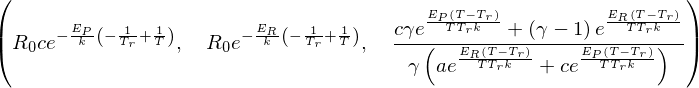

In [25]:
C_OTR = simplify((gamma * P_OTR- (1 - gamma) * R_OTR) / (gamma * (P_OTR  + a * R_OTR)))
(P_OTR, R_OTR, C_OTR)

The following figure shows that the Boltzmann-Arrhenus equations adequately capture the thermal responses of CUE below $T_{\text{pk},P}$:

In [ ]:
T_vec = 273.15+numpy.arange(0, T_pkP_par, 0.1) #OTR vector of temperatures

R_vec = numpy.array([R.evalf(subs = {R_0:R_0_par,E_R:E_R_par,b:b_par,T_pkR:T_pkR_par+273.15,T_r:T_r_par,E_D:E_D_par,k:k_par,T:temper}) for temper in T_vec])
P_vec = numpy.array([P.evalf(subs = {R_0:R_0_par,c:c_par,E_P:E_P_par,T_pkP:T_pkP_par+273.15,T_r:T_r_par,E_D:E_D_par,k:k_par,T:temper}) for temper in T_vec])
C_vec = numpy.array([C.evalf(subs = {R_0:R_0_par,gamma:gamma_par,b:b_par,a:a_par,c:c_par,E_P:E_P_par,E_R:E_R_par,T_pkP:T_pkP_par+273.15,T_pkR:T_pkR_par+273.15,T_r:T_r_par,E_D:E_D_par,k:k_par,T:temper}) for temper in T_vec])

R_OTR_vec = numpy.array([R_OTR.evalf(subs = {R_0:R_0_par,E_R:E_R_par,T_r:T_r_par,k:k_par,T:temper}) for temper in T_vec])
P_OTR_vec = numpy.array([P_OTR.evalf(subs = {R_0:R_0_par,c:c_par,E_P:E_P_par,T_r:T_r_par,k:k_par,T:temper}) for temper in T_vec])
C_OTR_vec = numpy.array([C_OTR.evalf(subs = {R_0:R_0_par,gamma:gamma_par,a:a_par,c:c_par,E_P:E_P_par,E_R:E_R_par,T_r:T_r_par,k:k_par,T:temper}) for temper in T_vec])

fig = plt.figure(); ax = fig.add_subplot(111)
plt.hold(False)
ax.plot(T_vec-273.15, R_vec.astype(float),'blue')
ax.plot(T_vec-273.15, P_vec.astype(float),'green')
ax.plot(T_vec-273.15, C_vec.astype(float),'black')
ax.plot(T_vec-273.15, R_OTR_vec.astype(float),'b--')
ax.plot(T_vec-273.15, P_OTR_vec.astype(float),'g--')
ax.plot(T_vec-273.15, C_OTR_vec.astype(float),'k--')

ax.set_xlabel('Temperature', fontsize=14, fontweight = 'bold')
ax.set_ylabel('Trait Values', fontsize=14, fontweight = 'bold')

plt.legend(['$R$ (Sharpe-Schoolfield)', '$P$ (Sharpe-Schoolfield)', 'CUE (Sharpe-Schoolfield)', '$R$ (Boltzmann-Arrhenius)', '$R$ (Boltzmann-Arrhenius)', 'CUE (Boltzmann-Arrhenius)'], loc='upper left', fontsize=10)

We can now approximate the CUE temperature response in the OTR by series expansions of both the numerator and denominator around $T_r$: 

In [ ]:
# This is too complicated: C_OTR_appx = simplify(exp(series(ln(C_OTR),T,T_r,2).removeO())) 

C_OTR_appx1 = simplify(exp(series(ln(gamma * P_OTR- (1 - gamma) * R_OTR),T,T_r,2).removeO()))

C_OTR_appx2 = simplify(exp(series(ln(gamma * (P_OTR  + a * R_OTR)),T,T_r,2).removeO()))

C_OTR_appx = C_OTR_appx1 / C_OTR_appx2

C_OTR_appx = simplify(simplify(C_OTR_appx))

C_OTR_appx
#print(latex(C_OTR_appx))

Thus, 

$$\text{CUE} \approx \frac{c \gamma + \gamma - 1}{\gamma (a + c)} e^{\frac{T - T_r}{k T_r^2 (a + c) \left(c \gamma + \gamma - 1\right)} \left((a + c) (E_P c \gamma + E_R \gamma - E_R) - (E_P c + E_R a) (c \gamma + \gamma - 1)\right)}
$$

Now, recall that

$$\Delta E := E_P c \gamma + E_R (\gamma - 1)$$

So 

$$\text{CUE} \approx \frac{c \gamma + \gamma - 1}{\gamma (a + c)} e^{\frac{T - T_r}{k T_r^2 (a + c) \left(c \gamma + \gamma - 1\right)} \left((a + c) \Delta E - (E_P c + E_R a) (c \gamma + \gamma - 1)\right)}
$$

and 

$$\log(\text{CUE}) \approx \log\left(\frac{c \gamma + \gamma - 1}{\gamma (a + c)}\right) + {\frac{T - T_r}{k T_r^2 (a + c) \left(c \gamma + \gamma - 1\right)} \left((a + c) \Delta E - (E_P c + E_R a) (c \gamma + \gamma - 1)\right)}
$$

Here again, accuracy of the above approximation depends on the reference temperature $T_r$. The approximation is good as long as $T_r$ lies within the OTR (0$^\circ$C - $T_{\text{pk},P}$), and the best when $T_r$ is the mid-point of the OTR. The following figure shows how good the approximation is: 

In [21]:
C_OTR_appx_vec = numpy.array([C_OTR_appx.evalf(subs = {R_0:R_0_par,gamma:gamma_par,a:a_par,c:c_par,E_P:E_P_par,E_R:E_R_par,T_r:T_r_par,k:k_par,T:temper}) for temper in T_vec])

fig = plt.figure(); ax = fig.add_subplot(111)
plt.hold(True)
ax.plot(T_vec-273.15, sc.log(C_vec.astype(float)),'black')
ax.plot(T_vec-273.15, sc.log(C_OTR_vec.astype(float)),'k--')
ax.plot(T_vec-273.15, sc.log(C_OTR_appx_vec.astype(float)),'r--')

ax.set_xlabel('Temperature', fontsize=14, fontweight = 'bold')
ax.set_ylabel('log(CUE)', fontsize=14, fontweight = 'bold')
plt.legend(['CUE (Sharpe-Schoolfield)', 'CUE (Boltzmann-Arrhenius)', 'CUE (Approximation)'], fontsize=10, loc='lower left')

NameError: name 'C_OTR_appx' is not defined

Thus the dependence of CUE on mismatches is more complicated, but still depends on the $\Delta E$ within the OTR...